In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline
cases = pd.read_csv('GA2_clean.csv')


In [32]:
cases.head()
cases.columns.values[0] = 'dates'
cases = cases.rename(columns = {'dates': 'dates'}, inplace = False)
cases

,dates,total_cases,new_cases,positive_rate,new_vaccinations,Mobility
0,2020-01-23,1.0,0.0,NaN,NaN,103.29
1,2020-01-24,2.0,1.0,NaN,NaN,113.06
2,2020-01-25,2.0,0.0,NaN,NaN,101.88
3,2020-01-26,5.0,3.0,NaN,NaN,81.35
4,2020-01-27,5.0,0.0,NaN,NaN,97.56
...,...,...,...,...,...,...
507,2021-06-13,33462003.0,4775.0,0.020,1209817.0,83.26
508,2021-06-14,33474734.0,12731.0,0.021,1323282.0,87.58
509,2021-06-15,33486038.0,11304.0,0.024,1240847.0,91.74
510,2021-06-16,33498468.0,12430.0,NaN,1028496.0,93.21


In [12]:
total_cases = cases['new_cases'].sum()

In [13]:
total_cases

33508866.0

In [25]:
cases.columns

Index(['dates', 'total_cases', 'new_cases', 'positive_rate',
       'new_vaccinations', 'Mobility'],
      dtype='object')

In [33]:
cases['dates']

0      2020-01-23
1      2020-01-24
2      2020-01-25
3      2020-01-26
4      2020-01-27
          ...    
507    2021-06-13
508    2021-06-14
509    2021-06-15
510    2021-06-16
511    2021-06-17
Name: dates, Length: 512, dtype: object

In [34]:
dates = cases['dates']

In [56]:
dates

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [47]:
dates = np.array([i for i in range(len(cases['dates']))]).reshape(-1,1)
new_cases = np.array([i for i in cases['new_cases']]).reshape(-1,1)
dates

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [42]:
new_cases

array([[0.00000e+00],
       [1.00000e+00],
       [0.00000e+00],
       [3.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [1.00000e+00],
       [0.00000e+00],
       [2.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [3.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [1.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [1.00000e+00],
       [0.00000e+00],
       [1.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [2.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [1.00000e+00],
       [0.00000e+00],
       [8.00000e+00],
       [7.00000e+00],
       [2.30000e+01],
       [1.90000e+01],
       [3.30000e+01],
       [7.70000e+01],
       [5.30000e+01],
       [1.66000e+02],
       [1.

In [50]:
lin_svr = SVR(kernel = 'linear',C = 1000.0)
lin_svr.fit(dates,new_cases)
poly_svr = SVR (kernel = 'poly',C = 1000.0,degree = 2)
poly_svr.fit(dates , new_cases)
rbf_svr = SVR(kernel = 'rbf',C= 1000.0,gamma = 0.15)
rbf_svr.fit(dates,new_cases)

C:\Users\Rutvik\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rutvik\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rutvik\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(C=1000.0, gamma=0.15)

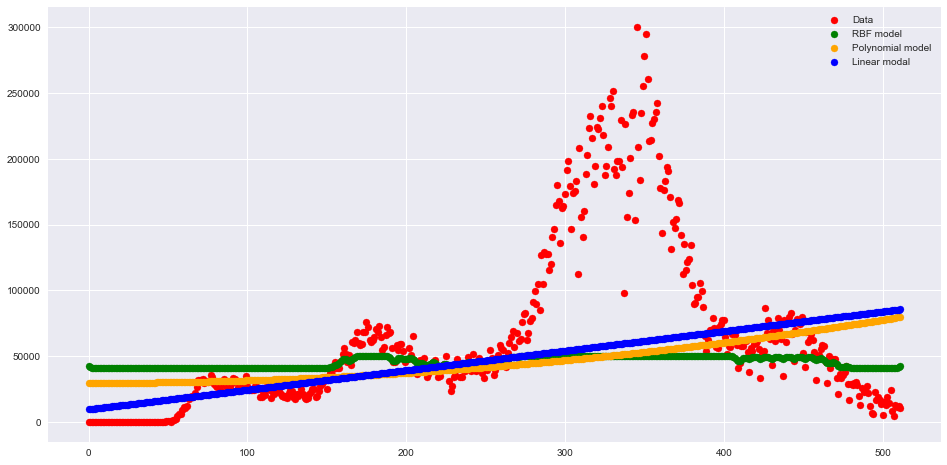

In [61]:
plt.figure(figsize=(16,8))
plt.scatter(dates,new_cases,color = 'red',label = 'Data')
plt.scatter(dates,rbf_svr.predict(dates),color = 'green',label = 'RBF model')
plt.scatter(dates,poly_svr.predict(dates),color = 'orange',label = 'Polynomial model')
plt.scatter(dates,lin_svr.predict(dates),color = 'blue',label = 'Linear modal')
plt.legend()
plt.show()

In [58]:
date = [[519]]
print(rbf_svr.predict(date))
print(poly_svr.predict(date))
print(lin_svr.predict(date))


[45639.22944878]
[81436.93902793]
[86749.81246318]


In [62]:
cases

,dates,total_cases,new_cases,positive_rate,new_vaccinations,Mobility
0,2020-01-23,1.0,0.0,NaN,NaN,103.29
1,2020-01-24,2.0,1.0,NaN,NaN,113.06
2,2020-01-25,2.0,0.0,NaN,NaN,101.88
3,2020-01-26,5.0,3.0,NaN,NaN,81.35
4,2020-01-27,5.0,0.0,NaN,NaN,97.56
...,...,...,...,...,...,...
507,2021-06-13,33462003.0,4775.0,0.020,1209817.0,83.26
508,2021-06-14,33474734.0,12731.0,0.021,1323282.0,87.58
509,2021-06-15,33486038.0,11304.0,0.024,1240847.0,91.74
510,2021-06-16,33498468.0,12430.0,NaN,1028496.0,93.21
